# 이탈 고객 예측
- 데이터 전처리 (결측치 처리, 클래스 불균형 확인 및 처리)
- 베이스 모델 선정
    - 분류모델: LogisticRegression
    - 클래스 리포트, 과적합 여부
- 베이스 모델의 성능을 상회하는 모델과 하이퍼 파라미터 조합을 찾아 성능 출력

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/pia222sk20/python/main/data/tellecom.csv"

df = pd.read_csv(url)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


- gender: 성별, ['Female', 'Male'] <br>
- SeniorCitizen: 노인 [0,1] <br>
- Partner: ['Yes', 'No'] <br>
- Dependents: ['No', 'Yes'] <br>
- tenure: 가입기간 <br>
- PhoneService: 전화서비스, ['No', 'Yes']

- MultipleLines: ['No phone service', 'No', 'Yes']
- InternetService: ['DSL', 'Fiber optic', 'No']

- OnlineSecurity, DeviceProtection, StreamingTV, StreamingMovies : ['No', 'Yes', 'No internet service']

- Contract: ['Month-to-month', 'One year', 'Two year']

- PaperlessBilling: 전자식 청구서 ['Yes', 'No']

- PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

- Churn: array([0, 1])
       






In [2]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

##### 데이터 전처리

In [3]:
# TotalCharges의  ' ' 제거
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(dtype='float64')
# df['TotalCharges'] = df['TotalCharges'].dropna()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [4]:
# gender 원핫인코딩
df['gender'] = df['gender'].map( {'Female' : 0, 'Male' : 1} )

In [5]:
df['Partner'] = df['Partner'].map( {'Yes' : 1, 'No' : 0} )
df['Dependents'] = df['Dependents'].map( {'Yes' : 1, 'No' : 0} )
df['PhoneService'] = df['PhoneService'].map( {'Yes' : 1, 'No' : 0} )
df['Churn'] = df['Churn'].map( {'Yes' : 1, 'No' : 0})

In [6]:
df = pd.get_dummies(df, columns=['Contract'], drop_first=True)
df[['Contract_One year','Contract_Two year']] = df[['Contract_One year', 'Contract_Two year']].astype(int)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   int64  
 2   SeniorCitizen      7043 non-null   int64  
 3   Partner            7043 non-null   int64  
 4   Dependents         7043 non-null   int64  
 5   tenure             7043 non-null   int64  
 6   PhoneService       7043 non-null   int64  
 7   MultipleLines      7043 non-null   object 
 8   InternetService    7043 non-null   object 
 9   OnlineSecurity     7043 non-null   object 
 10  OnlineBackup       7043 non-null   object 
 11  DeviceProtection   7043 non-null   object 
 12  TechSupport        7043 non-null   object 
 13  StreamingTV        7043 non-null   object 
 14  StreamingMovies    7043 non-null   object 
 15  PaperlessBilling   7043 non-null   object 
 16  PaymentMethod      7043 

In [8]:
print( df['gender'].value_counts(normalize=True) )
print('-'*50)
print( df['Partner'].value_counts(normalize=True) )
print('-'*50)
print( df['Dependents'].value_counts(normalize=True) )
print('-'*50)
print( df['PhoneService'].value_counts(normalize=True) )
print('-'*50)
print( df['Churn'].value_counts(normalize=True) )

gender
1    0.504756
0    0.495244
Name: proportion, dtype: float64
--------------------------------------------------
Partner
0    0.516967
1    0.483033
Name: proportion, dtype: float64
--------------------------------------------------
Dependents
0    0.700412
1    0.299588
Name: proportion, dtype: float64
--------------------------------------------------
PhoneService
1    0.903166
0    0.096834
Name: proportion, dtype: float64
--------------------------------------------------
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


#### 모델링

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [10]:
X = df[['gender','Partner','Dependents', 'PhoneService', 'TotalCharges', 'Contract_One year', 'Contract_Two year']]
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_pred)

print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1539
           1       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



#### 1) 하이퍼파라미터 튜닝

In [11]:
# 가중치 부여
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_pred)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1539
           1       0.44      0.90      0.59       574

    accuracy                           0.66      2113
   macro avg       0.69      0.73      0.65      2113
weighted avg       0.80      0.66      0.67      2113



##### 2) 오버샘플링

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", y_train_res.value_counts(normalize=True))

Before SMOTE: Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
After SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [13]:
X = df[['gender','Partner','Dependents', 'PhoneService', 'TotalCharges', 'Contract_One year', 'Contract_Two year']]
y = df['Churn']

smote = SMOTE(random_state=42)
X_train_res,y_train_res =  smote.fit_resample(X_train, y_train)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res,y_train_res)
y_pred = lr.predict(X_test)
lr.score(X_test,y_pred)

print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.64      0.75      1539
           1       0.45      0.79      0.58       574

    accuracy                           0.68      2113
   macro avg       0.67      0.72      0.66      2113
weighted avg       0.77      0.68      0.70      2113



##### 3) 변수 중요도

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/pia222sk20/python/main/data/tellecom.csv"
df = pd.read_csv(url)

# 수치형 변환
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 이진 변수 변환
bin_cols = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','TechSupport','OnlineBackup']
for c in bin_cols:
    df[c] = df[c].map({'Yes':1, 'No':0, 'Male':1, 'Female':0})

# 원핫인코딩 대상 다중범주 컬럼
df.columns = df.columns.str.strip()
multi_cols = [
    'MultipleLines','InternetService','OnlineSecurity','DeviceProtection',
    'StreamingTV','StreamingMovies','Contract','PaymentMethod'
]
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# 타깃
y = df['Churn']
X = df.drop(['Churn','customerID'], axis=1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [15]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,TechSupport,PaperlessBilling,...,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1.0,0.0,1,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0.0,0.0,0,...,True,False,False,False,False,True,False,False,False,True


In [16]:
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight='balanced',   # 불균형 대응
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 중요도 추출
importances = rf.feature_importances_
imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
imp_df = imp_df.sort_values('Importance', ascending=False)

# 상위 15개만 보기
print(imp_df.head(15))

                           Feature  Importance
10                    TotalCharges    0.173741
4                           tenure    0.160181
9                   MonthlyCharges    0.149381
24               Contract_Two year    0.053316
7                      TechSupport    0.049439
13     InternetService_Fiber optic    0.041755
26  PaymentMethod_Electronic check    0.035765
6                     OnlineBackup    0.031122
23               Contract_One year    0.030169
0                           gender    0.026210
16              OnlineSecurity_Yes    0.026118
8                 PaperlessBilling    0.025660
2                          Partner    0.021939
3                       Dependents    0.019251
18            DeviceProtection_Yes    0.018069


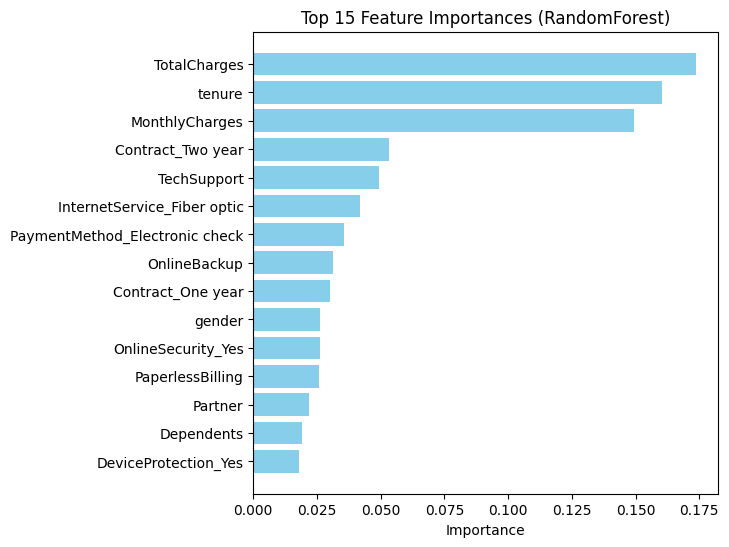

In [17]:
plt.figure(figsize=(6,6))
plt.barh(imp_df.head(15)['Feature'], imp_df.head(15)['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances (RandomForest)')
plt.xlabel('Importance')
plt.show()


In [18]:
df['TechSupport'] = df['TechSupport'].fillna('0').astype(dtype='int')
df.TechSupport

0       0
1       0
2       0
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    0
7042    1
Name: TechSupport, Length: 7043, dtype: int64

In [19]:
df[['TotalCharges','tenure','MonthlyCharges','TechSupport','gender','Contract_Two year','Contract_One year']].isna().sum()

TotalCharges         0
tenure               0
MonthlyCharges       0
TechSupport          0
gender               0
Contract_Two year    0
Contract_One year    0
dtype: int64

In [25]:
# 중요 변수 선정, Churn 오버샘플링, 스케일링, 로지스틱회귀 가중치 부여, 그리드서치 적용
from sklearn.preprocessing import StandardScaler

X = df[['TotalCharges','tenure','MonthlyCharges','TechSupport','gender','Contract_Two year','Contract_One year']]
y = df.loc[:,'Churn']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_res,y_train_res =  smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(C=0.01, penalty='l2', max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train_scaled ,y_train_res)
y_pred = lr.predict(X_test_scaled)
lr.score(X_test_scaled,y_pred)

print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

          No       0.90      0.73      0.80      1539
         Yes       0.52      0.78      0.62       574

    accuracy                           0.74      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113



In [21]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [22]:
# 파이프라인에 넣는법
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(C=0.01, penalty='l2', max_iter=1000, random_state=42, class_weight='balanced'))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

          No       0.92      0.70      0.79      1539
         Yes       0.51      0.84      0.63       574

    accuracy                           0.74      2113
   macro avg       0.71      0.77      0.71      2113
weighted avg       0.81      0.74      0.75      2113



##### 4) 그리드서치

In [23]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'lr__C': [0.01, 0.1, 1, 10],
#     'lr__penalty': ['l2']
# }

# grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
# grid.fit(X_train, y_train)
# print("Best params:", grid.best_params_)
# print("Best F1:", grid.best_score_)

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
classifier_rf.fit(X_train_scaled ,y_train_res)
y_pred = lr.predict(X_test_scaled)
lr.score(X_test_scaled,y_pred)

print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

          No       0.90      0.73      0.80      1539
         Yes       0.52      0.78      0.62       574

    accuracy                           0.74      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113

